In [408]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [410]:
sales = pd.read_csv(r'./sales.tsv', sep='\t')

In [411]:
# Question 1: How does the dataset look like?
salesProfile = pandas_profiling.ProfileReport(sales)
salesProfile.to_file(outputfile=r"./salesProfile.html")
salesProfile

Number of variables,10
Number of observations,213495
Total Missing (%),0.1%
Total size in memory,16.3 MiB
Average record size in memory,80.0 B
Numeric,4
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [412]:
# Dealing with negative values of amount.
# if amount >= 0, temp will be 1, else -1.
sales['temp'] = np.where(sales['amount'] >= 0, 1, -1)

# Add attribute: quantity of each item bought by each customer - on key 'name'
sales['quantity'] = sales.groupby(['order_id','name'])['temp'].transform('sum')
sales.drop('id', axis = 1).drop_duplicates()

,order_id,order_time,store_number,department,register,amount,upc,name,description,temp,quantity
0,44098873602538434607,1500720834000,2222,94,43,1.98,0000000000715756200020,STRAWBERRIES,STRAWBERRY 1,1,1.0
1,44098873602538434607,1500720834000,2222,94,43,2.48,0000000000074641006050,RED GRAPES,RED GRAPES 10Z CF,1,1.0
2,44098873602538434607,1500720834000,2222,92,43,3.92,0000000000078742147150,GV OR PB CRN,GV ORG PB CRUNCHY,1,1.0
3,44098873602538434607,1500720834000,2222,4,43,2.48,0000000000078742116760,ASST CUTLERY,GV PRM FS ASST 48CT,1,1.0
4,44098873602538434607,1500720834000,2222,92,43,3.77,0000000000016000432680,GRANOLA,NV OAT N HNY GRAN,1,1.0
5,44098873602538434607,1500720834000,2222,4,43,1.98,0000000000078742032750,FOOD BAGS,GV SAND 80CT COLOR,1,1.0
6,44098873602538434607,1500720834000,2222,82,43,0.98,0000000000042238302410,GOLD-BEARS,HARIBO GOLD BEAR 4OZ,1,1.0
7,44098873602538434607,1500720834000,2222,82,43,3.98,0000000000017082876310,ORIG JERKY,JL 2.85OZ ORIG JERKY,1,1.0
8,44098873602538434607,1500720834000,2222,90,43,2.82,0000000000041716842940,STR CHEESE,FGO STR LT MOZZ,1,1.0
9,44098873602538434607,1500720834000,2222,9,43,24.97,0000000000078257318910,TW AIRBED,INTX TWN RAISED W/OP,1,1.0


Text(0.5,1,'Frequency distribution of price of bananas')

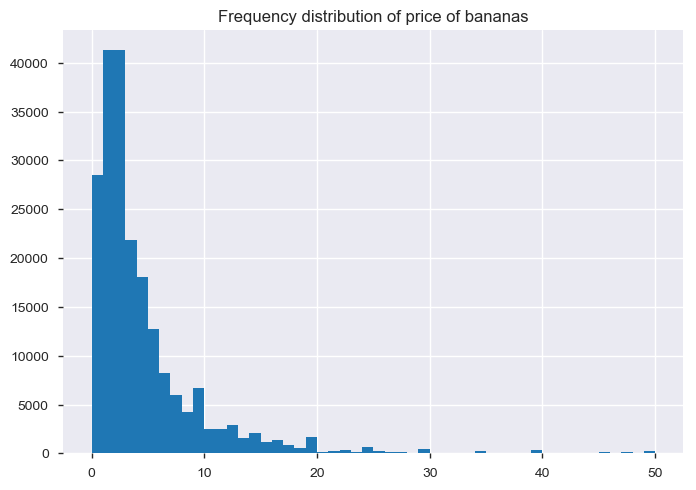

In [413]:
# The histogram for amount doesn't look quite right. Let's remove outliers.

plt.figure()
plt.hist(sales['amount'],histtype = 'bar', range = (0,50), bins = 50)
plt.title("Frequency distribution of price of bananas")

In [414]:
# Question 2: How many customers did each store have in the 2 days?
num_of_cust_per_store = sales.groupby('store_number')['order_id'].nunique()
num_of_cust_per_store

store_number
2222    15778
3333     7484
Name: order_id, dtype: int64

In [415]:
# Question 3: What is the total amount of sales each store did?
amount_of_sales_per_store = sales.groupby('store_number')['amount'].sum()
amount_of_sales_per_store

store_number
2222    838234.189999
3333    358681.460000
Name: amount, dtype: float64

In [416]:
# Question 4: What is the ratio of banana-buying-customers to non-banana-buying-customers?
# Question 5: What was the total bill amount of banana-buying-customers v/s non-banana-buying cutomers?
# Question 6: How many items are bought by banana-buying-customers v/s non-banana-buying cutomers?

# Coding step 1: Add attribute: Total bill amount
sales['total_bill_amount'] = sales['amount'].groupby(sales['order_id']).transform('sum')

# Coding step 2: Add attribute: Total_number_items bought by each customer
sales['Total_number_items'] = sales['quantity'].groupby(sales['order_id']).transform('sum')

In [417]:
# Coding step 3: create a dataset of banana buying customers
bananas = pd.DataFrame(sales[sales['name'].str.contains("bananas", case=False, regex = False, na = False)]['order_id'].unique())
bananas.columns = ['order_id']
banana_cust = bananas.merge(right=sales, left_on='order_id', right_on='order_id', how='left')

# Coding step 4: Generate a profile of banana-buying-customers
bananaCustProfile = pandas_profiling.ProfileReport(banana_cust)
bananaCustProfile.to_file(outputfile=r"./bananaCustProfile.html")
bananaCustProfile

Number of variables,14
Number of observations,46763
Total Missing (%),0.0%
Total size in memory,5.2 MiB
Average record size in memory,116.0 B
Numeric,7
Categorical,4
Boolean,2
Date,0
Text (Unique),1
Rejected,0


In [418]:
# Coding step 5: Create a dataset of non-banana-buying customers:
non_banana_cust = sales[~sales['order_id'].isin(banana_cust['order_id'])]

# Coding step 6: Generate a profile of non-banana-buying-customers
nonBananaCustProfile = pandas_profiling.ProfileReport(non_banana_cust)
nonBananaCustProfile.to_file(outputfile=r"C:\Users\Ruchita Garde\Documents\Professional\Assignments\Walmart/nonBananaCustProfile.html")
nonBananaCustProfile

Number of variables,15
Number of observations,166732
Total Missing (%),0.1%
Total size in memory,18.4 MiB
Average record size in memory,116.0 B
Numeric,8
Categorical,4
Boolean,2
Date,0
Text (Unique),1
Rejected,0


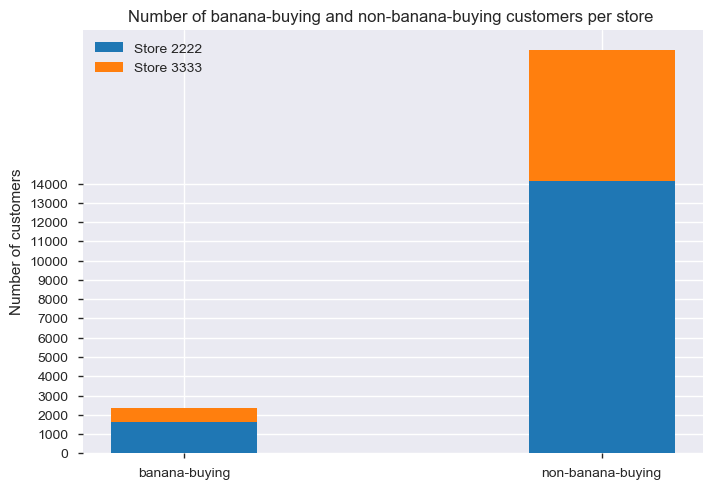

In [419]:
# Ratio of banana-buying-customers to non-banana-buying-customers for each store
# Just trying to understand the store-wise division

num_of_cust_per_store_banana = banana_cust.groupby('store_number')['order_id'].nunique().tolist()
num_of_cust_per_store_nonBanana = non_banana_cust.groupby('store_number')['order_id'].nunique().tolist()

N = 2
store2222 = (num_of_cust_per_store_banana[0],num_of_cust_per_store_nonBanana[0])
store3333 = (num_of_cust_per_store_banana[1], num_of_cust_per_store_nonBanana[1])
to_plot = np.arange(N)
width = 0.35
p1 = plt.bar(to_plot, store2222, width)
p2 = plt.bar(to_plot, store3333, width,
             bottom=store2222)
plt.ylabel('Number of customers')
plt.title('Number of banana-buying and non-banana-buying customers per store ')
plt.xticks(to_plot, ('banana-buying', 'non-banana-buying'))
plt.yticks(np.arange(0, 15000, 1000))
plt.legend((p1[0], p2[0]), ('Store 2222', 'Store 3333'))

plt.show()

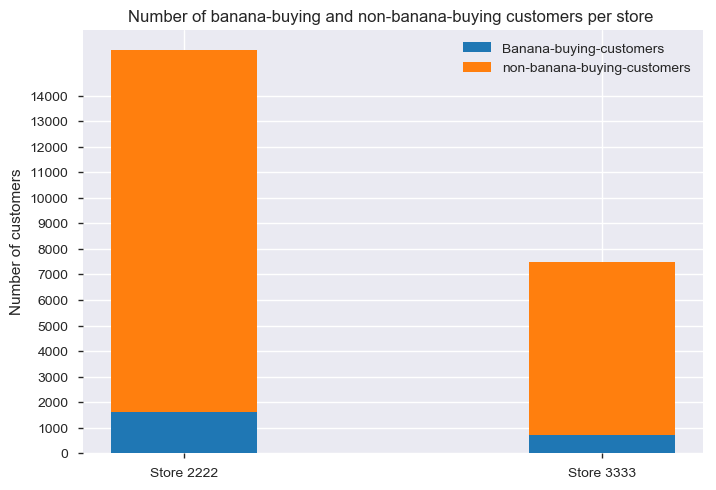

In [420]:
# A different implementation
N = 2
banana = (num_of_cust_per_store_banana[0],num_of_cust_per_store_banana[1])
nonBanana = (num_of_cust_per_store_nonBanana[0], num_of_cust_per_store_nonBanana[1])
to_plot = np.arange(N)
width = 0.35
p1 = plt.bar(to_plot, banana, width)
p2 = plt.bar(to_plot, nonBanana, width,
             bottom=banana)
plt.ylabel('Number of customers')
plt.title('Number of banana-buying and non-banana-buying customers per store ')
plt.xticks(to_plot, ('Store 2222', 'Store 3333'))
plt.yticks(np.arange(0, 15000, 1000))
plt.legend((p1[0], p2[0]), ('Banana-buying-customers', 'non-banana-buying-customers'))
plt.show()

In [421]:
# Question 8: Understanding the behaviour of banana-buying-customers through Market Basket Analysis / Association rule mining.

# Part 1: Generating association rules for the entire banana dataset for both stores
# Generate a basket of items bought
banana_cust['name'] = banana_cust['name'].str.strip()
banana_cust['name'] = banana_cust['name'].astype('str')

basket1 = (banana_cust.groupby(['order_id', 'name'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))

# Perform one hot encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets1 = basket1.applymap(encode_units)

# Generate frequent item sets that have a support of at least 7%
frequent_itemsets1 = apriori(basket_sets1, min_support=0.07, use_colnames=True)
frequent_itemsets1.sort_values('support',axis = 0, ascending=False)

,support,itemsets
2,0.955051,[BANANAS]
3,0.149829,[BREAD]
12,0.147260,"[BANANAS, BREAD]"
1,0.122003,[AVOCADO]
11,0.118579,"[AVOCADO, BANANAS]"
10,0.114298,[WHOLE MILK]
19,0.110017,"[BANANAS, WHOLE MILK]"
7,0.106592,[STRAWBERRIES]
16,0.101455,"[BANANAS, STRAWBERRIES]"
9,0.100599,[WATERMELON]


In [422]:
# To generate the rules with their corresponding support, confidence and lift:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(AVOCADO),(BANANAS),0.122003,0.955051,0.118579,0.971930,1.017673,0.002059,1.601295
1,(BANANAS),(AVOCADO),0.955051,0.122003,0.118579,0.124160,1.017673,0.002059,1.002462
2,(BANANAS),(BREAD),0.955051,0.149829,0.147260,0.154191,1.029114,0.004166,1.005157
3,(BREAD),(BANANAS),0.149829,0.955051,0.147260,0.982857,1.029114,0.004166,2.622003
4,(BANANAS),(CHERRIES),0.955051,0.085188,0.082192,0.086060,1.010233,0.000833,1.000954
5,(CHERRIES),(BANANAS),0.085188,0.955051,0.082192,0.964824,1.010233,0.000833,1.277825
6,(BANANAS),(CUCUMBER),0.955051,0.074486,0.072774,0.076199,1.022994,0.001636,1.001854
7,(CUCUMBER),(BANANAS),0.074486,0.955051,0.072774,0.977011,1.022994,0.001636,1.955265
8,(PKG SALAD),(BANANAS),0.089041,0.955051,0.086045,0.966346,1.011826,0.001006,1.335616
9,(BANANAS),(PKG SALAD),0.955051,0.089041,0.086045,0.090094,1.011826,0.001006,1.001157


In [423]:
# Part 2: Let's see if there are any differences between store 2222 and store 3333. This is for store 2222

# Generate a basket of items bought
banana_store2222 = banana_cust[banana_cust['store_number'].apply(str).str.contains("2222")]

basket2 = (banana_store2222.groupby(['order_id', 'name'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))

# Perform one hot encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets2 = basket2.applymap(encode_units)

# Generate frequent item sets that have a support of at least 7%
frequent_itemsets2 = apriori(basket_sets2, min_support=0.07, use_colnames=True)
frequent_itemsets2.sort_values('support',axis = 0, ascending=False)

,support,itemsets
3,0.964483,[BANANAS]
5,0.162890,[BREAD]
19,0.159216,"[BANANAS, BREAD]"
12,0.150031,[STRAWBERRIES]
26,0.142682,"[BANANAS, STRAWBERRIES]"
13,0.133497,[TOMATO ROMA]
27,0.129210,"[BANANAS, TOMATO ROMA]"
10,0.127373,[PKG SALAD]
24,0.123086,"[BANANAS, PKG SALAD]"
2,0.121862,[AVOCADO]


In [424]:
# To generate the rules with their corresponding support, confidence and lift:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2 MILK),(BANANAS),0.102878,0.964483,0.099816,0.970238,1.005967,0.000592,1.193386
1,(BANANAS),(2 MILK),0.964483,0.102878,0.099816,0.103492,1.005967,0.000592,1.000685
2,(3 ORANGES),(BANANAS),0.080220,0.964483,0.077771,0.969466,1.005167,0.000400,1.163197
3,(BANANAS),(3 ORANGES),0.964483,0.080220,0.077771,0.080635,1.005167,0.000400,1.000451
4,(BELL PEPPER),(BANANAS),0.081445,0.964483,0.078996,0.969925,1.005643,0.000443,1.180955
5,(BANANAS),(BELL PEPPER),0.964483,0.081445,0.078996,0.081905,1.005643,0.000443,1.000501
6,(BANANAS),(BREAD),0.964483,0.162890,0.159216,0.165079,1.013438,0.002111,1.002622
7,(BREAD),(BANANAS),0.162890,0.964483,0.159216,0.977444,1.013438,0.002111,1.574607
8,(BULK CORN),(BANANAS),0.088181,0.964483,0.085119,0.965278,1.000825,0.000070,1.022903
9,(BANANAS),(BULK CORN),0.964483,0.088181,0.085119,0.088254,1.000825,0.000070,1.000080


In [425]:
# Part 3: Let's see if there are any differences between store 2222 and store 3333. This is for store 3333.

# Generate a basket of items bought
banana_store3333 = banana_cust[banana_cust['store_number'].apply(str).str.contains("3333")]

basket3 = (banana_store3333.groupby(['order_id', 'name'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))

# Perform one hot encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets3 = basket3.applymap(encode_units)

# Generate frequent item sets that have a support of at least 7%
frequent_itemsets3 = apriori(basket_sets3, min_support=0.07, use_colnames=True)
frequent_itemsets3.sort_values('support',axis = 0, ascending=False)

,support,itemsets
1,0.933144,[BANANAS]
9,0.180654,[MM WATER]
24,0.180654,"[BANANAS, MM WATER]"
29,0.173542,"[BANANAS, WATERMELON]"
14,0.173542,[WATERMELON]
28,0.140825,"[BANANAS, STRAWBERRY]"
13,0.140825,[STRAWBERRY]
15,0.130868,[WHOLE MILK]
30,0.130868,"[BANANAS, WHOLE MILK]"
7,0.126600,[MM 2 % MILK]


In [426]:
# To generate the rules with their corresponding support, confidence and lift:
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
rules3

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(AVOCADO),(BANANAS),0.122333,0.933144,0.122333,1.000000,1.071646,0.008179,inf
1,(BANANAS),(AVOCADO),0.933144,0.122333,0.122333,0.131098,1.071646,0.008179,1.010087
2,(BANANAS),(BREAD),0.933144,0.119488,0.119488,0.128049,1.071646,0.007989,1.009818
3,(BREAD),(BANANAS),0.119488,0.933144,0.119488,1.000000,1.071646,0.007989,inf
4,(CANTALOUPE),(BANANAS),0.079659,0.933144,0.079659,1.000000,1.071646,0.005326,inf
5,(BANANAS),(CANTALOUPE),0.933144,0.079659,0.079659,0.085366,1.071646,0.005326,1.006240
6,(BANANAS),(CHERRIES),0.933144,0.075391,0.075391,0.080793,1.071646,0.005040,1.005876
7,(CHERRIES),(BANANAS),0.075391,0.933144,0.075391,1.000000,1.071646,0.005040,inf
8,(CHICKEN),(BANANAS),0.096728,0.933144,0.096728,1.000000,1.071646,0.006467,inf
9,(BANANAS),(CHICKEN),0.933144,0.096728,0.096728,0.103659,1.071646,0.006467,1.007732


In [ ]:
# Part 4: Trying to apply the association rule to non-banana-dataset for curiosity purposes. This is for store 2222.
# Generate a basket of items bought
non_banana_cust['name'] = non_banana_cust['name'].str.strip()
non_banana_cust['name'] = non_banana_cust['name'].astype('str')

non_banana_store2222 = non_banana_cust[non_banana_cust['store_number'].apply(str).str.contains("2222")]

basket4 = (non_banana_store2222.groupby(['order_id', 'name'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))

# Perform one hot encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets4 = basket4.applymap(encode_units)

# Generate frequent item sets that have a support of at least 7%
frequent_itemsets4 = apriori(basket_sets4, min_support=0.001, use_colnames=True)
frequent_itemsets4.sort_values('support',axis = 0, ascending=False)

In [ ]:
# To generate the rules with their corresponding support, confidence and lift:
rules4 = association_rules(frequent_itemsets4, metric="lift", min_threshold=1)
rules4

In [370]:
# Part 5: Trying to apply the association rule to non-banana-dataset for curiosity purposes. This is for store 3333.
# Generate a basket of items bought
non_banana_cust['name'] = non_banana_cust['name'].str.strip()
non_banana_cust['name'] = non_banana_cust['name'].astype('str')

non_banana_store3333 = non_banana_cust[non_banana_cust['store_number'].apply(str).str.contains("3333")]

# basket5 = (non_banana_store3333.groupby(['order_id', 'name'])['quantity']
#           .sum().unstack().reset_index().fillna(0)
#           .set_index('order_id'))

# # Perform one hot encoding
# def encode_units(x):
#     if x <= 0:
#         return 0
#     if x >= 1:
#         return 1

# basket_sets5 = basket5.applymap(encode_units)

# # Generate frequent item sets that have a support of at least 7%
# frequent_itemsets5 = apriori(basket_sets4 min_support=0.001, use_colnames=True)
# frequent_itemsets5.sort_values('support',axis = 0, ascending=False)

C:\Users\Ruchita Garde\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ruchita Garde\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
# To generate the rules with their corresponding support, confidence and lift:
rules5 = association_rules(frequent_itemsets5, metric="lift", min_threshold=1)
rules5.count()

In [427]:
# Question 8: Which customers should be engaged?
# Get a list of customers who bought the items derived from the market basket analysis from the non-banana-buying dataset
# for each store separately. They are our target customers.

# Part 1: For store 2222:
items2222 = ['2 MILK', '3 ORANGES', 'BELL PEPPER', 'BREAD', 'BULK CORN', 'CUCUMBER', 'EGGS 18CT', 'PKG SALAD', 'TOMATO ROMA']
target_2222cust = non_banana_store2222[sales['name'].isin(items2222)]['order_id'].unique()
target_2222cust

array(['50714160254798007286', '7556532968029717923',
       '04498776642536450687', ..., '65430524192681354162',
       '13922440053877178054', '788695337958024704903'], dtype=object)

In [428]:
# Part 2: For store 3333:
items3333 = ['AVOCADO', 'BREAD', 'CANTALOUPE', 'CHERRIES', 'CHICKEN', 'DEERPARK WTR', 'MM 2% MILK', 'MM ORG EGGS', 'MM WATER', 'ORG BLUEB', 'RED GRAPES', 'SAUD 36 EGGS', 'STRAWBERRY', 'WATERMELON', 'WHOLE MILK']
target_3333cust = non_banana_store3333[sales['name'].isin(items3333)]['order_id'].unique()
target_3333cust

array(['13141808320265338916', '72106585486752476035',
       '33030524199488164588', ..., '48565435958129964812',
       '802988079697939621263', '24987796849519874421'], dtype=object)

In [429]:
# Question 10: What should the expected impact to the business be?
# Calculate the average cost of a banana transaction, and the cost we would charge our customers after 10% discount.
average_banana_price = sales[sales['name'].str.contains("bananas", case=False, regex = False, na = False)]['amount'].aggregate('mean')
after_discount_banana_price = average_banana_price*0.9
after_discount_banana_price

0.7686622619510378

In [430]:
# Step 2: Calculate the total sales from bananas for each store
banana_total_sales_2222 = banana_store2222[banana_store2222['name'].str.contains("bananas", case=False, regex = False, na = False)]['amount'].aggregate('sum')
banana_total_sales_3333 = banana_store3333[banana_store3333['name'].str.contains("bananas", case=False, regex = False, na = False)]['amount'].aggregate('sum')

# Step 3: Also calculate % increase in sales in total and for each store
new_banana_sales_2222 = (len(target_2222cust)/2)*after_discount_banana_price
percent_increase_2222 = (new_banana_sales_2222*100)/banana_total_sales_2222
percent_increase_2222

68.00446755153673

In [431]:
new_banana_sales_3333 = (len(target_3333cust)/2)*after_discount_banana_price
percent_increase_3333 = (new_banana_sales_3333*100)/banana_total_sales_3333
percent_increase_3333

35.48041059977359

In [432]:
# Total increase in sales for both stores together
new_banana_sales = ((len(target_3333cust)+len(target_2222cust))/2)*after_discount_banana_price
percent_increase = (new_banana_sales*100)/(banana_total_sales_2222+banana_total_sales_3333)
percent_increase

49.984453944812024